In [ ]:
##(C) Machine Learning: 
##Machine Learning Linear regression assignments 

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
car= pd.read_csv("/Users/bibekprasad/Documents/Data science webex/auto_mpg.csv")

In [6]:
car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
car.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
car["car name"].value_counts()

ford pinto                           6
amc matador                          5
ford maverick                        5
toyota corolla                       5
amc gremlin                          4
                                    ..
datsun 310 gx                        1
oldsmobile cutlass ciera (diesel)    1
ford mustang gl                      1
pontiac lemans v6                    1
buick opel isuzu deluxe              1
Name: car name, Length: 305, dtype: int64

In [11]:
data=pd.DataFrame(car,columns={"mpg","acceleration"})

In [57]:
data

,mpg,acceleration
0,18.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5
...,...,...
393,27.0,15.6
394,44.0,24.6
395,32.0,11.6
396,28.0,18.6


In [13]:
from scipy.stats import zscore

In [14]:
dataA=data.apply(zscore)

In [15]:
dataA

,mpg,acceleration
0,-0.706439,-1.295498
1,-1.090751,-1.477038
2,-0.706439,-1.658577
3,-0.962647,-1.295498
4,-0.834543,-1.840117
...,...,...
393,0.446497,0.011586
394,2.624265,3.279296
395,1.087017,-1.440730
396,0.574601,1.100822


In [16]:
#checking null valuea
pd.isna(dataA["mpg"]).sum()



0

In [17]:
x=dataA["acceleration"]



In [18]:
x.head()

0   -1.295498
1   -1.477038
2   -1.658577
3   -1.295498
4   -1.840117
Name: acceleration, dtype: float64

In [19]:
x=np.array(dataA["acceleration"])#for fit statement as it accepts array like data

In [20]:
y=np.array(dataA["mpg"])

In [21]:
x

array([-1.29549834, -1.47703779, -1.65857724, -1.29549834, -1.84011669,
       -2.02165614, -2.38473503, -2.56627448, -2.02165614, -2.56627448,
       -2.02165614, -2.74781393, -2.20319559, -2.02165614, -0.20626165,
       -0.02472221, -0.02472221,  0.15681724, -0.3878011 ,  1.79067228,
        0.70143559, -0.3878011 ,  0.70143559, -1.1139589 , -0.20626165,
       -0.56934055, -0.20626165, -0.75088   ,  1.06451448, -0.3878011 ,
       -0.02472221, -0.56934055,  1.24605393, -0.93241945, -0.02472221,
       -0.02472221, -0.02472221, -0.02472221, -1.29549834, -1.47703779,
       -0.75088   , -0.93241945, -1.47703779, -1.29549834, -1.29549834,
       -0.75088   ,  1.24605393, -0.20626165, -0.3878011 , -0.56934055,
       -0.56934055,  1.42759338, -0.3878011 ,  1.24605393,  0.88297504,
        1.24605393,  1.79067228, -0.02472221,  0.51989614,  2.87990897,
        1.42759338,  0.33835669, -1.29549834, -1.29549834, -0.75088   ,
       -0.93241945, -1.47703779, -1.65857724, -0.75088   , -0.75

In [22]:
y

array([-7.06438701e-01, -1.09075062e+00, -7.06438701e-01, -9.62646649e-01,
       -8.34542675e-01, -1.09075062e+00, -1.21885460e+00, -1.21885460e+00,
       -1.21885460e+00, -1.09075062e+00, -1.09075062e+00, -1.21885460e+00,
       -1.09075062e+00, -1.21885460e+00,  6.21851453e-02, -1.94022803e-01,
       -7.06438701e-01, -3.22126778e-01,  4.46497068e-01,  3.18393094e-01,
        1.90289120e-01,  6.21851453e-02,  1.90289120e-01,  3.18393094e-01,
       -3.22126778e-01, -1.73127050e+00, -1.73127050e+00, -1.60316652e+00,
       -1.85937447e+00,  4.46497068e-01,  5.74601043e-01,  1.90289120e-01,
        1.90289120e-01, -5.78334726e-01, -9.62646649e-01, -8.34542675e-01,
       -5.78334726e-01, -7.06438701e-01, -1.21885460e+00, -1.21885460e+00,
       -1.21885460e+00, -1.21885460e+00, -1.47506255e+00, -1.34695857e+00,
       -1.34695857e+00, -7.06438701e-01, -1.94022803e-01, -5.78334726e-01,
       -7.06438701e-01, -6.59188290e-02,  5.74601043e-01,  8.30808991e-01,
        8.30808991e-01,  

In [23]:
x.shape

(398,)

In [24]:
x=x.reshape(len(x),1)

In [25]:
x

array([[-1.29549834],
       [-1.47703779],
       [-1.65857724],
       [-1.29549834],
       [-1.84011669],
       [-2.02165614],
       [-2.38473503],
       [-2.56627448],
       [-2.02165614],
       [-2.56627448],
       [-2.02165614],
       [-2.74781393],
       [-2.20319559],
       [-2.02165614],
       [-0.20626165],
       [-0.02472221],
       [-0.02472221],
       [ 0.15681724],
       [-0.3878011 ],
       [ 1.79067228],
       [ 0.70143559],
       [-0.3878011 ],
       [ 0.70143559],
       [-1.1139589 ],
       [-0.20626165],
       [-0.56934055],
       [-0.20626165],
       [-0.75088   ],
       [ 1.06451448],
       [-0.3878011 ],
       [-0.02472221],
       [-0.56934055],
       [ 1.24605393],
       [-0.93241945],
       [-0.02472221],
       [-0.02472221],
       [-0.02472221],
       [-0.02472221],
       [-1.29549834],
       [-1.47703779],
       [-0.75088   ],
       [-0.93241945],
       [-1.47703779],
       [-1.29549834],
       [-1.29549834],
       [-0

In [26]:
y=y.reshape(len(x),1)

In [27]:
y

array([[-7.06438701e-01],
       [-1.09075062e+00],
       [-7.06438701e-01],
       [-9.62646649e-01],
       [-8.34542675e-01],
       [-1.09075062e+00],
       [-1.21885460e+00],
       [-1.21885460e+00],
       [-1.21885460e+00],
       [-1.09075062e+00],
       [-1.09075062e+00],
       [-1.21885460e+00],
       [-1.09075062e+00],
       [-1.21885460e+00],
       [ 6.21851453e-02],
       [-1.94022803e-01],
       [-7.06438701e-01],
       [-3.22126778e-01],
       [ 4.46497068e-01],
       [ 3.18393094e-01],
       [ 1.90289120e-01],
       [ 6.21851453e-02],
       [ 1.90289120e-01],
       [ 3.18393094e-01],
       [-3.22126778e-01],
       [-1.73127050e+00],
       [-1.73127050e+00],
       [-1.60316652e+00],
       [-1.85937447e+00],
       [ 4.46497068e-01],
       [ 5.74601043e-01],
       [ 1.90289120e-01],
       [ 1.90289120e-01],
       [-5.78334726e-01],
       [-9.62646649e-01],
       [-8.34542675e-01],
       [-5.78334726e-01],
       [-7.06438701e-01],
       [-1.2

In [28]:
#creating test data and train data
#importing for sklearn

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
from sklearn import linear_model

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=60)


In [64]:
x_train

array([[ 1.42759338],
       [-0.24256954],
       [-1.29549834],
       [-0.75088   ],
       [-0.02472221],
       [ 1.06451448],
       [-1.29549834],
       [-1.22288256],
       [ 1.10082237],
       [-0.56934055],
       [-0.3878011 ],
       [-1.47703779],
       [-0.53303266],
       [ 0.88297504],
       [ 0.15681724],
       [ 1.24605393],
       [-0.09733799],
       [ 0.59251192],
       [-1.47703779],
       [ 0.95559081],
       [ 0.15681724],
       [-0.93241945],
       [-0.93241945],
       [ 0.33835669],
       [ 0.70143559],
       [ 0.91928292],
       [ 1.79067228],
       [-0.3878011 ],
       [-0.3878011 ],
       [-0.3878011 ],
       [-0.20626165],
       [-0.3878011 ],
       [-0.02472221],
       [-0.16995376],
       [-0.3878011 ],
       [ 0.3020488 ],
       [ 2.4079064 ],
       [ 2.26267484],
       [-0.56934055],
       [-1.65857724],
       [-0.67826422],
       [-0.13364588],
       [ 1.86328806],
       [ 0.62881981],
       [ 0.6651277 ],
       [ 0

In [63]:
y_train.shape

(318, 1)

In [65]:
x_test.shape

(80, 1)

In [66]:
y_test.shape

(80, 1)

In [67]:
reg=linear_model.LinearRegression()

In [68]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
#Ex 6. Display the coefficients coef, intercept and residues 

In [70]:
#slope
reg.coef_

array([[0.46201822]])

In [71]:
#intercept
reg.intercept_

array([-0.01478756])

In [72]:
#Predictive model . mpg=0.42391652*Acceleration+intercept


In [73]:
#Ex 8. Perform Accuracy check using the R Square
##test the model with test data
acc=reg.score(x_train,y_train)      ##ACCURACY CHECK

In [74]:
acc


0.20365782485633555

In [75]:
#Ex 7.Predict using test data 
##Predict the values (output) from the model 
y_pred=reg.predict(x_test)

In [76]:
y_pred[3]

array([0.05766486])

In [77]:
x_test[3]

array([0.15681724])

In [78]:
y_test[3]

array([0.62584263])

In [79]:
x_test[4]

array([-0.42410899])

In [80]:
y_test[4]

array([1.56100164])

In [81]:
y_pred[4]

array([-0.21073364])

In [82]:
#plot a graph

import matplotlib.pyplot as plt

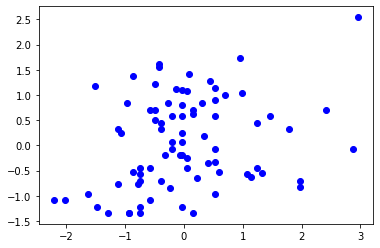

In [83]:
plt.scatter(x_test,y_test,color="blue")

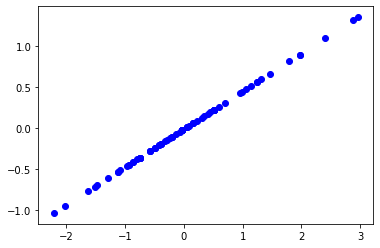

In [84]:
plt.scatter(x_test,y_pred,color="blue")

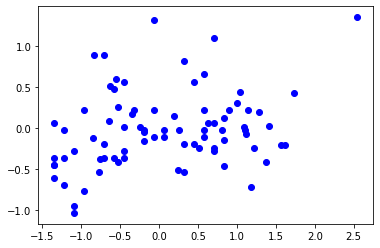

In [85]:
plt.scatter(y_test,y_pred,color="blue")

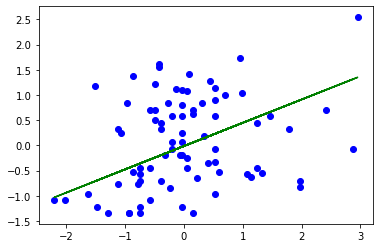

In [86]:
##Ex 9. Display using scatter plot the data points and the best fit line 

plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,y_pred,color="green")